# Predictive Modeling of Airline Customer Satisfaction Using Machine Learning


Ilaria Gallo,
Remo Irtuso

## Dataset

### Dataset Information

The data used for this data mining project was found at the following link:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

The collection of this information is nothing more than the result of surveys that were submitted to an airline's customers.

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import os
import pickle
import sys
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import auc


np.random.seed(50)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = pd.concat([df_train, df_test])
print('-'*50 )
print("Shape of data: ",df.shape)
print('-'*50 )
df.head()

--------------------------------------------------
Shape of data:  (129880, 25)
--------------------------------------------------


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
# Let's remove the Unnamed column
df = df.drop(df_train.columns[0], axis=1)

# Since the character / could cause problems, we replace this character
df.columns = df.columns.str.replace("/", " ")

# Display the data again
display(df.head())


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Let's display the summary of the data information
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 non

In [4]:
# Columns of attributes for which the value 0 means data not acquired
service_columns = df.columns[7:21]

# Perform the substitution
df[service_columns] = df[service_columns].replace({'0': np.nan, 0: np.nan})

# Display the changes
display(df.head())
df.info()


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,...,5.0,4.0,3.0,4,4.0,5.0,5.0,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,...,1.0,1.0,5.0,3,1.0,4.0,1.0,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,...,5.0,4.0,3.0,4,4.0,4.0,5.0,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,...,2.0,2.0,5.0,3,1.0,4.0,2.0,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,...,3.0,3.0,4.0,4,3.0,3.0,3.0,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              125964 non-null  float64
 8   Departure Arrival time convenient  123199 non-null  float64
 9   Ease of Online booking             124198 non-null  float64
 10  Gate location                      129879 non-null  float64
 11  Food and drink                     129748 non

In [5]:
# Calculate the fraction of missing data for each attribute
pd.DataFrame(df.isnull().sum() / df.shape[0])


,0
id,0.000000
Gender,0.000000
Customer Type,0.000000
Age,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,0.000000
Inflight wifi service,0.030151
Departure Arrival time convenient,0.051440
Ease of Online booking,0.043748


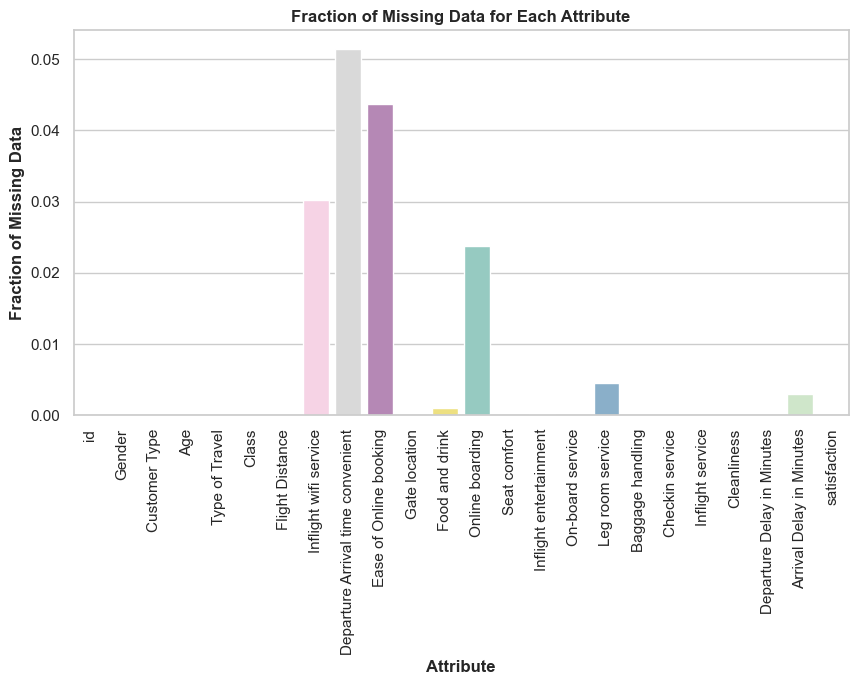

In [6]:
# Calculate the fraction of missing data for each attribute
missing_fraction = df.isnull().sum() / df.shape[0]

# Create a DataFrame with the values
missing_df = pd.DataFrame(missing_fraction, columns=['Missing Fraction'])

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the histogram with different colors for each column
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_df.index, y='Missing Fraction', data=missing_df, palette="Set3")

plt.xticks(rotation=90)
plt.xlabel('Attribute', fontweight='bold')
plt.ylabel('Fraction of Missing Data', fontweight='bold')
plt.title('Fraction of Missing Data for Each Attribute', fontweight='bold')

plt.show()


In [7]:
#let's see the characteristics of numerical data
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,125964.000000,123199.000000,124198.000000,129879.000000,129748.000000,126800.000000,129879.000000,129862.000000,129875.000000,129282.000000,129880.000000,129879.000000,129875.000000,129866.00000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.813526,3.223411,2.883001,2.976948,3.208034,3.331640,3.441388,3.358542,3.383153,3.366377,3.632114,3.306293,3.642333,3.28668,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.258336,1.386673,1.300440,1.278498,1.326673,1.267096,1.319259,1.333555,1.286953,1.299367,1.180025,1.266157,1.176475,1.31331,38.071126,38.465650
min,1.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.00000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.00000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.00000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,1592.000000,1584.000000


## Preliminary analysis and assumptions

Of the attributes present within the dataset, those that could most influence customer satisfaction, excluding the attributes that concern the services offered, are:

* Customer Type: a customer remains loyal to a company when he or she is satisfied with the services it offers;
* Class: a customer who travels in a Business class, due to the quality of the services offered, tends to be more satisfied than those who travel in Economy or Economy plus;
* Departure Delay in Minutes: Flights that depart late tend to decrease customer satisfaction;
* Arrival Delay in Minutes: identical problem to the previous one which instead of considering departures, considers arrivals.
So let's go and check the assumptions made.

First assumption: Loyal customers tend to be more satisfied

In [8]:
# Count how many customers are satisfied based on the attributes Customer Type and satisfaction
df_customer_type = df.groupby(['Customer Type', 'satisfaction'])[['id']].count()

# Rename the 'id' column to 'count'
df_customer_type = df_customer_type.rename({'id': 'count'}, axis=1)

# Calculate the probability that, depending on the type of customer, they are satisfied or not
df_customer_type['prob'] = df_customer_type['count'] / df.groupby('Customer Type').count()['satisfaction']

# Display the result
df_customer_type


count      prob
Customer Type     satisfaction                            
Loyal Customer    neutral or dissatisfied  55372  0.521885
                  satisfied                50728  0.478115
disloyal Customer neutral or dissatisfied  18080  0.760303
                  satisfied                 5700  0.239697

The results obtained do not support the assumption made but give us much more information regarding the Customer Type attribute. In fact, it seems that the percentage of dissatisfied or indifferent loyal customers is higher than satisfied ones, even if only slightly.

Even customers who occasionally travel with the airline tend to be very dissatisfied, with a percentage of 76%. This can lead us to deduce that occasional customers tend to be more dissatisfied with the services offered. For easier visualization of the information, let's display the pie charts.

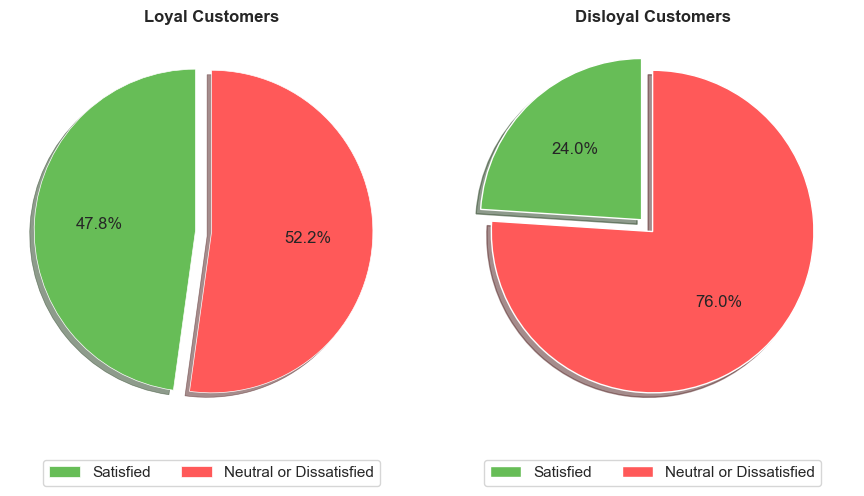

In [9]:
# Filter the DataFrame for loyal customers
loyal_customers = df[df["Customer Type"] == "Loyal Customer"]

# Filter the DataFrame for disloyal customers
disloyal_customers = df[df["Customer Type"] == "disloyal Customer"]

# Calculate the percentage of satisfied and unsatisfied loyal customers
satisfied_loyal_customers = loyal_customers[loyal_customers["satisfaction"] == "satisfied"].shape[0]
unsatisfied_loyal_customers = loyal_customers[loyal_customers["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_loyal_customers = loyal_customers.shape[0]
loyal_customer_percent = [satisfied_loyal_customers / number_of_loyal_customers, unsatisfied_loyal_customers / number_of_loyal_customers]

# Calculate the percentage of satisfied and unsatisfied disloyal customers
satisfied_disloyal_customers = disloyal_customers[disloyal_customers["satisfaction"] == "satisfied"].shape[0]
unsatisfied_disloyal_customers = disloyal_customers[disloyal_customers["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_disloyal_customers = disloyal_customers.shape[0]
disloyal_customer_percent = [satisfied_disloyal_customers / number_of_disloyal_customers, unsatisfied_disloyal_customers / number_of_disloyal_customers]

# Labels for the pie chart segments
labels = ['Satisfied', 'Neutral or Dissatisfied']
colors = ['#67BD57', '#FF5959']

# Create the charts
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

# Pie chart for loyal customers
ax[0].pie(loyal_customer_percent, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0),
          wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}, shadow=True)
ax[0].set_title('Loyal Customers', fontweight='bold')
ax[0].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

# Pie chart for disloyal customers
ax[1].pie(disloyal_customer_percent, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0),
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, shadow=True)
ax[1].set_title('Disloyal Customers', fontweight='bold')
ax[1].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


Second assumption: Business class customers tend to be more satisfied given the services offered by this type of ticket

In [10]:
# With similar operations to the previous ones, we verify the second assumption
df_class = df.groupby(['Class', 'satisfaction'])[['id']].count()
df_class = df_class.rename({'id': 'count'}, axis=1)
df_class['prob'] = df_class['count'] / df.groupby('Class').count()['satisfaction']

# Display the result
df_class


count      prob
Class    satisfaction                            
Business neutral or dissatisfied  18994  0.305566
         satisfied                43166  0.694434
Eco      neutral or dissatisfied  47366  0.812327
         satisfied                10943  0.187673
Eco Plus neutral or dissatisfied   7092  0.753586
         satisfied                 2319  0.246414

In this case the results verify the assumption made. In fact, there is a percentage of satisfied Business class customers of 69%.

In contrast, for Economy and Economy plus classes we have a huge percentage of dissatisfied customers, 81% and 75% respectively. Also in this case, let's visualize the pie charts.

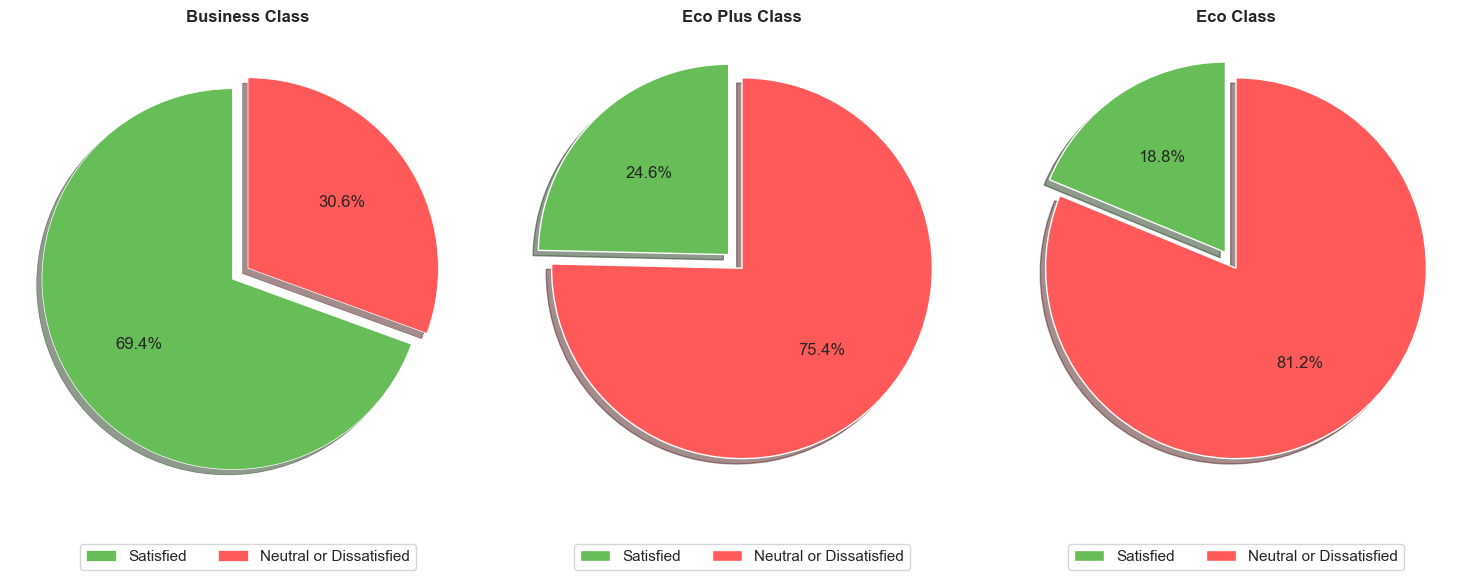

In [11]:
# Filter the DataFrame for customers traveling in business class
business_class = df[df["Class"] == "Business"]

# Filter the DataFrame for customers traveling in eco plus class
eco_plus_class = df[df["Class"] == "Eco Plus"]

# Filter the DataFrame for customers traveling in eco class
eco_class = df[df["Class"] == "Eco"]

# Calculate the percentage of satisfied and unsatisfied customers traveling in business class
satisfied_business_class = business_class[business_class["satisfaction"] == "satisfied"].shape[0]
unsatisfied_business_class = business_class[business_class["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_business_class = business_class.shape[0]
business_class_percent = [satisfied_business_class / number_of_business_class, unsatisfied_business_class / number_of_business_class]

# Calculate the percentage of satisfied and unsatisfied customers traveling in eco plus class
satisfied_eco_plus_class = eco_plus_class[eco_plus_class["satisfaction"] == "satisfied"].shape[0]
unsatisfied_eco_plus_class = eco_plus_class[eco_plus_class["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_eco_plus_class = eco_plus_class.shape[0]
eco_plus_class_percent = [satisfied_eco_plus_class / number_of_eco_plus_class, unsatisfied_eco_plus_class / number_of_eco_plus_class]

# Calculate the percentage of satisfied and unsatisfied customers traveling in eco class
satisfied_eco_class = eco_class[eco_class["satisfaction"] == "satisfied"].shape[0]
unsatisfied_eco_class = eco_class[eco_class["satisfaction"] == "neutral or dissatisfied"].shape[0]
number_of_eco_class = eco_class.shape[0]
eco_class_percent = [satisfied_eco_class / number_of_eco_class, unsatisfied_eco_class / number_of_eco_class]

# Labels for the pie chart segments
labels = ['Satisfied', 'Neutral or Dissatisfied']
colors = ['#67BD57', '#FF5959']

# Create the charts
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Pie chart for business class customers
ax[0].pie(business_class_percent, autopct='%1.1f%%', startangle=90, colors=colors, 
          wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)
ax[0].set_title('Business Class', fontweight='bold')
ax[0].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

# Pie chart for eco plus class customers
ax[1].pie(eco_plus_class_percent, autopct='%1.1f%%', startangle=90, colors=colors, 
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)
ax[1].set_title('Eco Plus Class', fontweight='bold')
ax[1].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

# Pie chart for eco class customers
ax[2].pie(eco_class_percent, autopct='%1.1f%%', startangle=90, colors=colors, 
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)
ax[2].set_title('Eco Class', fontweight='bold')
ax[2].legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


Third assumption: late flights tend to increase travellers' dissatisfaction. We take as a reference point for our calculations the flights that depart with a delay greater than the average which we remember to be around 15 minutes

In [12]:
# Calculate the average departure delay
average_departure_delay = df['Departure Delay in Minutes'].mean()

# Group the data by the 'satisfaction' column and count the number of delayed flights for each category
df_departure_delay = df[df['Departure Delay in Minutes'] > average_departure_delay].groupby('satisfaction').size().reset_index(name='count')

# Calculate the probability of dissatisfaction for delayed flights
df_departure_delay['prob'] = df_departure_delay['count'] / df[df['Departure Delay in Minutes'] > average_departure_delay].shape[0]

df_departure_delay


,satisfaction,count,prob
0,neutral or dissatisfied,18764,0.62882
1,satisfied,11076,0.37118


As we expected, late flights leave customers dissatisfied. Only 37% of passengers, despite the delays, are satisfied with the service. Also in this case, let's view the graphs for greater readability of the results.

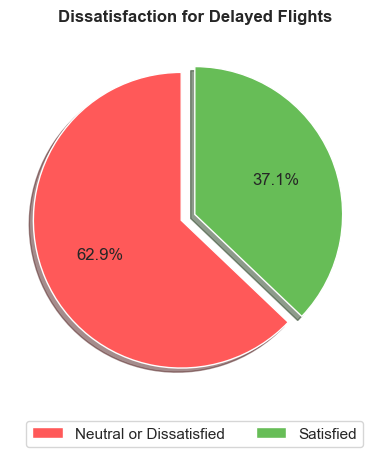

In [13]:
# Calculate the probability of dissatisfaction for flights that depart late
unsatisfied_prob = df_departure_delay[df_departure_delay['satisfaction'] == 'neutral or dissatisfied']['prob'].values[0]
satisfied_prob = df_departure_delay[df_departure_delay['satisfaction'] == 'satisfied']['prob'].values[0]

# Labels for the pie chart segments
labels = ['Neutral or Dissatisfied', 'Satisfied']
colors = ['#FF5959', '#67BD57']

# Create the pie chart
plt.pie([unsatisfied_prob, satisfied_prob], colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)

# Title of the chart
plt.title('Dissatisfaction for Delayed Flights', fontweight='bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()


Fourth assumption: late flights tend to increase customer dissatisfaction. We take as a reference point for our calculations, also in this case, the flights that arrive with a delay greater than the average which we remember to be around 15 minutes

In [14]:
# Calculate the average arrival delay
average_arrival_delay = df['Arrival Delay in Minutes'].mean()

# Group the data by the 'satisfaction' column and count the number of delayed flights for each category
df_arrival_delay = df[df['Arrival Delay in Minutes'] > average_arrival_delay].groupby('satisfaction').size().reset_index(name='count')

# Calculate the probability of dissatisfaction for delayed flights
df_arrival_delay['prob'] = df_arrival_delay['count'] / df[df['Arrival Delay in Minutes'] > average_arrival_delay].shape[0]

# Display the result
df_arrival_delay


,satisfaction,count,prob
0,neutral or dissatisfied,18980,0.642127
1,satisfied,10578,0.357873


We can see how arriving late has a higher percentage of dissatisfied customers, albeit slightly, than departures. In this case, in fact, the percentage of dissatisfied customers is equal to 64%. Let's visualize a pie chart that summarizes what has been said.

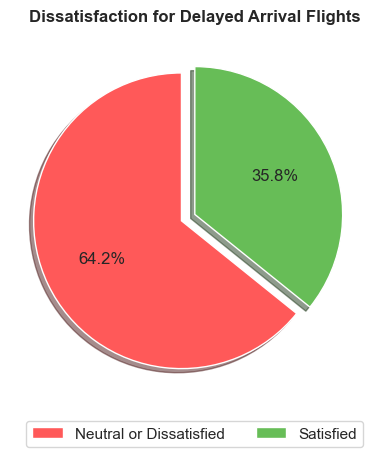

In [15]:
# Calculate the probability of dissatisfaction for flights that arrive late
unsatisfied_prob = df_arrival_delay[df_arrival_delay['satisfaction'] == 'neutral or dissatisfied']['prob'].values[0]
satisfied_prob = df_arrival_delay[df_arrival_delay['satisfaction'] == 'satisfied']['prob'].values[0]

# Labels for the pie chart segments
labels = ['Neutral or Dissatisfied', 'Satisfied']
colors = ['#FF5959', '#67BD57']

# Create the pie chart
plt.pie([unsatisfied_prob, satisfied_prob], colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)

# Title of the chart
plt.title('Dissatisfaction for Delayed Arrival Flights', fontweight='bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()


The percentages of customer dissatisfaction for flights that arrive late or depart late are more or less the same, so one might think of not making a distinction between arrival and departure, thus considering the overall delay.

Let us now try to see if there is also some correlation between other attributes (not used in hiring and which are not part of the services used to evaluate customer satisfaction) and the satisfaction class.

,id,Gender,Age,Type of Travel,Flight Distance,satisfaction,satisfaction_numeric,Gender_numeric,Type of Travel_numeric
0,70172,Male,13,Personal Travel,460,neutral or dissatisfied,0,1,1
1,5047,Male,25,Business travel,235,neutral or dissatisfied,0,1,0
2,110028,Female,26,Business travel,1142,satisfied,1,0,0
3,24026,Female,25,Business travel,562,neutral or dissatisfied,0,0,0
4,119299,Male,61,Business travel,214,satisfied,1,1,0


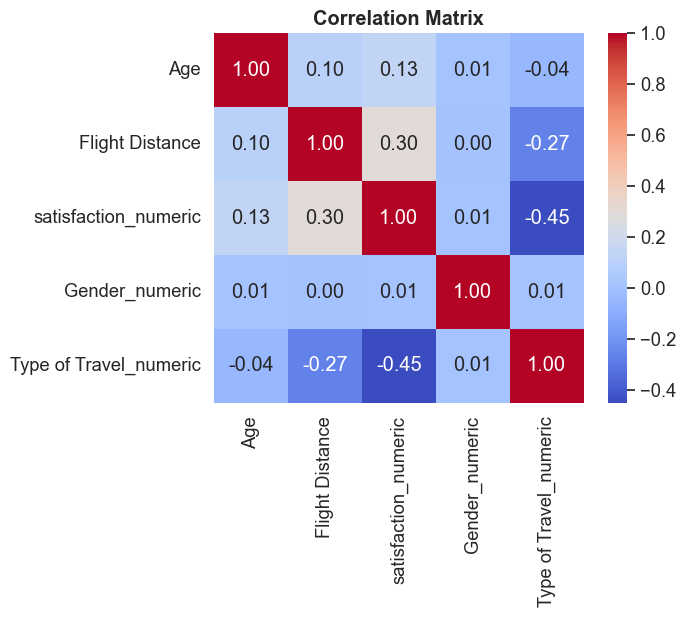

In [16]:
# Filter the DataFrame for the desired columns
selected_columns = ['id', 'Gender', 'Age', 'Type of Travel', 'Flight Distance', 'satisfaction']
selected_df = df[selected_columns]

# Map the variables 'satisfaction', 'Gender', and 'Type of Travel' to numerical values
selected_df['satisfaction_numeric'] = selected_df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
selected_df['Gender_numeric'] = selected_df['Gender'].map({'Female': 0, 'Male': 1})
selected_df['Type of Travel_numeric'] = selected_df['Type of Travel'].map({'Business travel': 0, 'Personal Travel': 1})

display(selected_df.head())

df_for_correlation = selected_df[['Age', 'Flight Distance', 'satisfaction_numeric', 'Gender_numeric', 'Type of Travel_numeric']]

# Calculate the correlation matrix
corr_matrix = df_for_correlation.corr()

# Create the correlation matrix heatmap
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add a title to the heatmap
plt.title('Correlation Matrix', fontweight='bold')

plt.show()


As we can see, the correlation between satisfaction, Age, id, and Gender is very low, indicating that the target attribute is not influenced by the other three. However, there is a moderate correlation between the target variable and the attributes Type of Travel and Flight Distance.

## Missing data management
As regards columns from 7 to 20, we replace the missing data with the median as these columns are characterized by a range of values ​​ranging from 1 to 5, relating to customer satisfaction regarding a specific area, and replace these data with the median it seems the most 'impartial' alternative.

In the case of the Arrival Delay in Minutes column, however, we replace the missing values ​​with the average value, in this way we can reduce the impact of the missing data on the classification algorithms and also avoid the loss of information due to the elimination of the rows with missing values.

In [17]:
# Replace missing data in columns 7-20 with the median
columns_to_replace = df.columns[7:21]
median_values = df[columns_to_replace].median()
df[columns_to_replace] = df[columns_to_replace].fillna(median_values)

# For the column 'Arrival Delay in Minutes', replace NaN values with the mean
mean_column = round(df["Arrival Delay in Minutes"].mean())
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(mean_column)


## Elimination of attributes not related to the target variable

In [18]:
# Removal of uncorrelated attributes
df = df.drop("Age", axis=1)
df = df.drop("Gender", axis=1)
df = df.drop("id", axis=1)

print('-'*50)
print("Shape after removing uncorrelated attributes:", df.shape)
print('-'*50)


--------------------------------------------------
Shape after removing uncorrelated attributes: (129880, 21)
--------------------------------------------------


## Aggregation of the column relating to delays

In [19]:
#Aggregation into a single column relating to delays
#The sum is used to take into account the overall delay
df['Overall Delay'] = df['Arrival Delay in Minutes'] + df['Departure Delay in Minutes']

colonne_da_rimuovere = ['Arrival Delay in Minutes', 'Departure Delay in Minutes']
df = df.drop(colonne_da_rimuovere, axis=1)
df.describe()

,Flight Distance,Inflight wifi service,Departure Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Overall Delay
count,129880.000000,129880.000000,129880.000000,129880.00000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,1190.316392,2.819148,3.211919,2.88812,2.976948,3.207823,3.347490,3.441392,3.358631,3.383177,3.369295,3.632114,3.306290,3.642347,3.286649,29.804566
std,997.452477,1.239631,1.351438,1.27190,1.278493,1.326015,1.256105,1.319255,1.333484,1.286934,1.297082,1.180025,1.266152,1.176454,1.313242,75.716180
min,31.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,414.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,844.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,1744.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,24.000000
max,4983.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3176.000000


## Outliers
We first check the fraction of records that fall into the following delay ranges:

* [0-60] minutes
* (60-120] minutes
* (120-180] minutes
* delays greater than 180 minutes

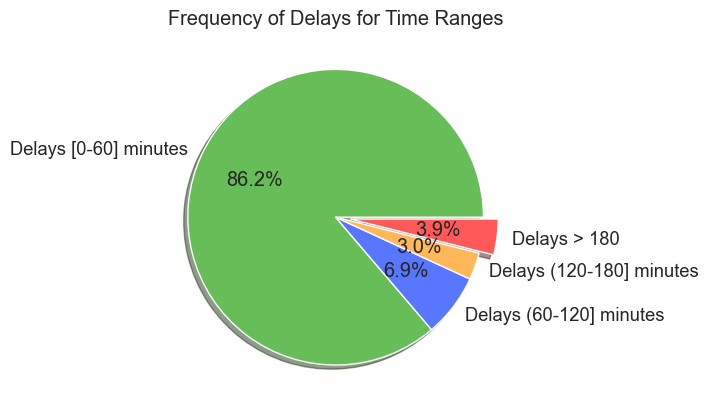

In [20]:
# Number of rows
delay_counts = df['Overall Delay'].value_counts()

# Define delay categories
categories = ['Delays [0-60] minutes', 'Delays (60-120] minutes', 'Delays (120-180] minutes', 'Delays > 180']

# Filter and sum the frequencies of delay categories
freq_0_60 = delay_counts[(delay_counts.index >= 0) & (delay_counts.index <= 60)].sum()
freq_60_120 = delay_counts[(delay_counts.index > 60) & (delay_counts.index <= 120)].sum()
freq_120_180 = delay_counts[(delay_counts.index > 120) & (delay_counts.index <= 180)].sum()
freq_over_180 = delay_counts[delay_counts.index > 180].sum()

# Create a list with the frequencies of delay categories
frequencies = [freq_0_60, freq_60_120, freq_120_180, freq_over_180]

colors = [ '#67BD57',  '#5976FF','#FFB759','#FF5959']

# Create the pie chart
plt.pie(frequencies, labels=categories, colors=colors, autopct='%1.1f%%', explode=(0, 0, 0, 0.1), shadow=True)
plt.title('Frequency of Delays for Time Ranges')
plt.show()


As we can see from the pie chart, only a very small percentage of flights are delayed by more than 3 hours. Overall, therefore, we have that flights that are delayed by a maximum of 3 hours represent the majority of flights. Let's visualize the percentages better by considering flights with delays ranging from 0 to 180 minutes in a single portion.

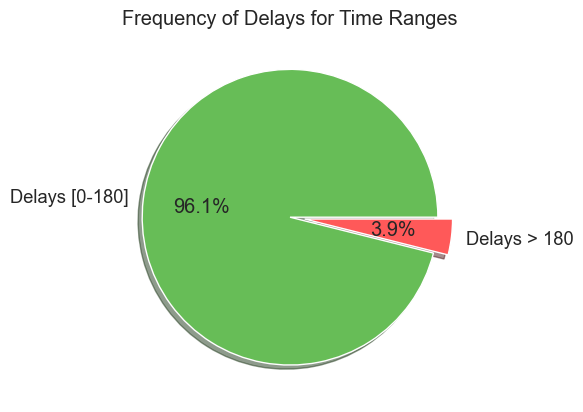

In [21]:
colors = ['#67BD57', '#FF5959']
labels = ['Delays [0-180]', 'Delays > 180']
# Create the pie chart
plt.pie([frequencies[0] + frequencies[1] + frequencies[2], freq_over_180], labels=labels, colors=colors, autopct='%1.1f%%', explode=(0, 0.1), shadow=True)

plt.title('Frequency of Delays for Time Ranges')
plt.show()


The percentage of records with flights delayed by more than 180 minutes is approximately 4%. It will be through these records that we will carry out a more in-depth analysis on customer satisfaction. Let us now check more precisely the distribution of records that have a delay greater than 180 minutes.

This is necessary because outliers can negatively affect statistical analyzes and models, as they represent extreme values ​​that can skew mean, variance, and other metrics.


Upper limit:  181.2369254713141
Number of outliers:  5024


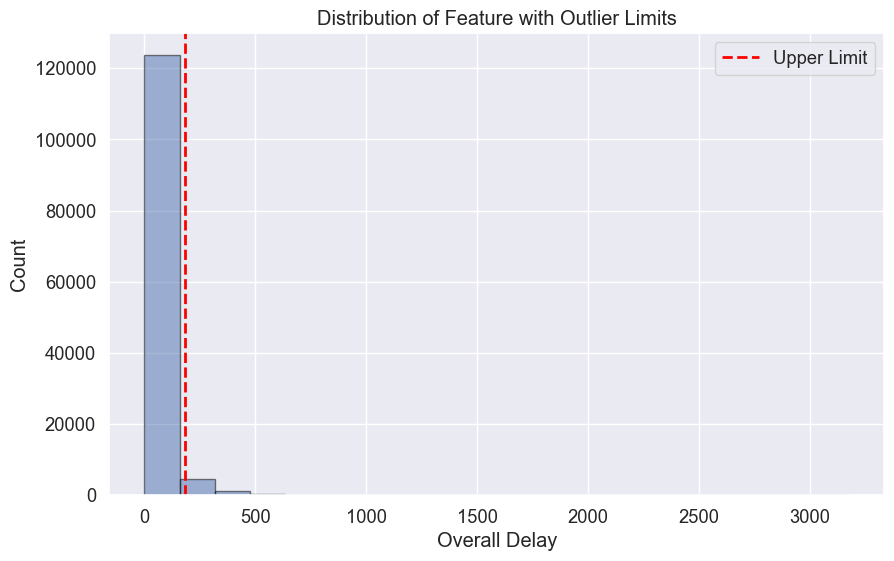

In [22]:
# Calculate the mean and standard deviation of the 'Overall Delay' column
mean = df["Overall Delay"].mean()
std = df["Overall Delay"].std()

# Define a threshold to identify outliers based on the standard deviation
threshold = 2  # threshold set empirically

# Calculate the lower and upper limits to identify outliers
# We do not define a lower limit as there are no negative delays
upper_limit = mean + threshold * std
print('Upper limit: ', upper_limit)

outliers = df[df["Overall Delay"] > upper_limit]  # consider records that exceed the upper limit
print('Number of outliers: ', outliers['Overall Delay'].count())

# Visualize the data distribution with outlier limits
plt.figure(figsize=(10, 6))
plt.hist(df["Overall Delay"], bins=20, edgecolor='black', alpha=0.5)
plt.axvline(upper_limit, color='red', linestyle='dashed', linewidth=2, label='Upper Limit')
plt.xlabel("Overall Delay")
plt.ylabel('Count')
plt.title('Distribution of Feature with Outlier Limits')
plt.legend()
plt.show()


The number of records we must therefore analyze is approximately 5,000. When evaluating the outliers you have two choices:
* Eliminate outliers in order to reduce any influence they may have on the analysis. On the other hand, we may lose relevant information
* Maintain the outliers without risking losing any information but with the possibility that our analyzes may be influenced by their presence

So let's check whether satisfied customers actually exist despite the delays

--------------------------------------------------
Percentage of satisfied customers: 35.68869426751593
Percentage of dissatisfied customers: 64.31130573248409
--------------------------------------------------


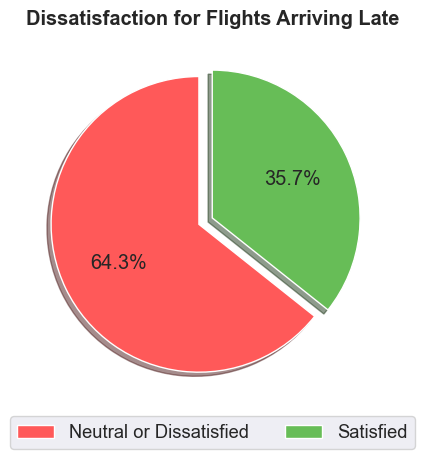

In [23]:
# Calculation of the count of values in the 'satisfaction' column in the DataFrame df_outliers
count_satisfied = outliers['satisfaction'].value_counts()['satisfied']
count_dissatisfied = outliers['satisfaction'].value_counts()['neutral or dissatisfied']

# Calculation of the percentages of satisfied and dissatisfied customers
percentage_satisfied = (count_satisfied / len(outliers)) * 100
percentage_dissatisfied = (count_dissatisfied / len(outliers)) * 100

print('-'*50)
print("Percentage of satisfied customers:", percentage_satisfied)
print("Percentage of dissatisfied customers:", percentage_dissatisfied)
print('-'*50)

# Labels for the pie chart segments
labels = ['Neutral or Dissatisfied', 'Satisfied']
colors = ['#FF5959', '#67BD57']

# Create the pie chart
plt.pie([percentage_dissatisfied, percentage_satisfied], colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)

# Title of the chart
plt.title('Dissatisfaction for Flights Arriving Late', fontweight='bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()


From this analysis it is possible to note that for flights with a delay of more than 3 hours approximately a third of customers remain satisfied and this situation can be defined as an anomaly.

Despite this, outliers represent real situations that can occur occasionally, it could be useful to keep them in the dataset in order to be able to represent the information contained in the dataset even better.

## Data transformation
Un'operazione necessaria è la normalizzazione dei dati in quanto questi presentano diverse scale di valori. Ciò garantisce che gli attributi abbiano un'influenza sulla variabile target più equilibrata. La tecnica che useremo è la mean normalization.

The attributes we are going to normalize are:
* Flight Distance
* Overall Delay

In [24]:
# Calculate the mean and standard deviation of the columns 'Flight Distance', 'Departure Delay in Minutes', and 'Arrival Delay in Minutes'
flight_distance_mean = df['Flight Distance'].mean()
flight_distance_std = df['Flight Distance'].std()
overall_delay_mean = df['Overall Delay'].mean()
overall_delay_std = df['Overall Delay'].std()

# Apply standardization to the columns 'Flight Distance', 'Departure Delay in Minutes', and 'Arrival Delay in Minutes'
df['Flight Distance'] = (df['Flight Distance'] - flight_distance_mean) / flight_distance_std
df['Overall Delay'] = (df['Overall Delay'] - overall_delay_mean) / overall_delay_std

# Check the normalization
print('-'*50)
display(df['Flight Distance'])
print('-'*50)
print('-'*50)
display(df['Overall Delay'])
print('-'*50)


--------------------------------------------------


0       -0.732182
1       -0.957756
2       -0.048440
3       -0.629921
4       -0.978810
           ...   
25971   -0.666013
25972   -0.545707
25973   -0.363242
25974   -0.063478
25975   -0.928682
Name: Flight Distance, Length: 129880, dtype: float64

--------------------------------------------------
--------------------------------------------------


0        0.174275
1       -0.301185
2       -0.393635
3       -0.129491
4       -0.393635
           ...   
25971   -0.393635
25972   -0.393635
25973   -0.393635
25974   -0.393635
25975   -0.393635
Name: Overall Delay, Length: 129880, dtype: float64

--------------------------------------------------


Another useful transformation is to represent categorical attributes as:
* Customer Type
* Type of Travel
* Class

in the form of numerical vectors with the help of One-Hot Encoding.

In [25]:
# Applying one-hot encoding
customer_type_encoded = pd.get_dummies(df['Customer Type'])
type_of_travel_encoded = pd.get_dummies(df['Type of Travel'])
class_encoded = pd.get_dummies(df['Class'])

# Displaying the shape of the newly created dataframes
print('-'*50)
print('Customer type encoded shape: ', customer_type_encoded.shape)
print('-'*50)
print('-'*50)
print('Type of Travel encoded shape: ', type_of_travel_encoded.shape)
print('-'*50)
print('-'*50)
print('Class encoded shape: ', class_encoded.shape)
print('-'*50)


--------------------------------------------------
Customer type encoded shape:  (129880, 2)
--------------------------------------------------
--------------------------------------------------
Type of Travel encoded shape:  (129880, 2)
--------------------------------------------------
--------------------------------------------------
Class encoded shape:  (129880, 3)
--------------------------------------------------


In [26]:
# Remove the columns that have been encoded
df = df.drop("Customer Type", axis=1)
df = df.drop("Type of Travel", axis=1)
df = df.drop("Class", axis=1)

# Concatenate the encoded columns
df = pd.concat([df, customer_type_encoded], axis=1)
df = pd.concat([df, type_of_travel_encoded], axis=1)
df = pd.concat([df, class_encoded], axis=1)

# Display the result
print('-'*50)
print('Shape after One-Hot Encoding: ', df.shape)
print('-'*50)
display(df.head())


--------------------------------------------------
Shape after One-Hot Encoding:  (129880, 24)
--------------------------------------------------


,Flight Distance,Inflight wifi service,Departure Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Cleanliness,satisfaction,Overall Delay,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,-0.732182,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,...,5.0,neutral or dissatisfied,0.174275,True,False,False,True,False,False,True
1,-0.957756,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,...,1.0,neutral or dissatisfied,-0.301185,False,True,True,False,True,False,False
2,-0.048440,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,...,5.0,satisfied,-0.393635,True,False,True,False,True,False,False
3,-0.629921,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,...,2.0,neutral or dissatisfied,-0.129491,True,False,True,False,True,False,False
4,-0.978810,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,...,3.0,satisfied,-0.393635,True,False,True,False,True,False,False


## Checking the balance between classes

In [27]:
# Count the occurrences for each value of the attribute
balance_percentages = df['satisfaction'].value_counts(normalize=True) * 100
print(balance_percentages)


satisfaction
neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: proportion, dtype: float64


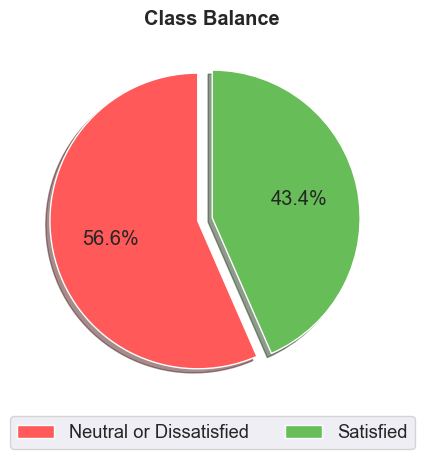

In [28]:
# Labels for the pie chart segments
labels = ['Neutral or Dissatisfied', 'Satisfied']
colors = ['#FF5959', '#67BD57']

# Create the pie chart
plt.pie([balance_percentages[0], balance_percentages[1]], colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, explode=(0.1, 0), shadow=True)

# Title of the chart
plt.title('Class Balance', fontweight='bold')
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.show()


As we can see from the graph there is a slight imbalance of the classes. However, this distribution of classes, for the purpose of the project, appears to be quite adequate without the need for balancing. Since the class of dissatisfied customers is the one to which the most records belong, this represents, by convention, the negative class, whilst satisfied customers are part of the positive class. We can therefore immediately establish that the most relevant evaluation metric for the choice of the model will be the specificity which indicates the fraction of records belonging to the negative class correctly classified.

## Classification

After a preliminary phase in which the data is analyzed and transformed to ensure that it meets our needs, it is possible to build the classification models.
The objective of this session is to train different models and then compare them and choose which of these is the most suitable for classifying our data.

The models that will be taken into consideration are:

* Logistic Regression
* Stochastic gradient descent
* Decision trees
* Multi-level Neural Networks

### Creation of the training set and test set


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Let's create X and Y
X = df.drop('satisfaction', axis=1)
Y = df['satisfaction']

print('-'*50)
print('X')
display(X.head())
print('-'*50)
print('Y')
display(Y.value_counts())
print('-'*50)

# Creating the dataframe to structure the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy (Training)', 'Precision (Training)', 'Recall (Training)', 'Specificity (Training)', 'F-Measure (Training)', 'Accuracy (Validation)', 'Precision (Validation)', 'Recall (Validation)', 'Specificity (Validation)', 'F-Measure (Validation)', 'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'Specificity (Test)', 'F-Measure (Test)'])

# Method that performs classification automatically to simplify the process
def classification(method_name, model, X, Y):
    tmp_df = pd.DataFrame(columns=['Model', 'Accuracy (Training)', 'Precision (Training)', 'Recall (Training)', 'Specificity (Training)', 'F-Measure (Training)', 'Accuracy (Validation)', 'Precision (Validation)', 'Recall (Validation)', 'Specificity (Validation)', 'F-Measure (Validation)', 'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'Specificity (Test)', 'F-Measure (Test)'])
    from sklearn.model_selection import train_test_split

    # Split the data into train (60%), validation (20%), and test (20%)
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

    model.fit(X_train, Y_train)

    # Calculate the results
    model_results = evaluate(method_name, model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

    tmp_df = pd.concat([tmp_df, pd.DataFrame(model_results).transpose()])

    # Make predictions on the test data
    Y_pred = model.predict(X_test)

    # Create the confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)

    # Create the graphs to visualize the confusion matrix and ROC curves
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_confusion_matrix(cm, ax=axes[0])
    plot_roc_curve(model, X_test, Y_test, ax=axes[1])
    axes[0].set_title('Confusion Matrix')
    axes[1].set_title('ROC Curve')
    plt.tight_layout()
    plt.show()
    return tmp_df

def evaluate(method_name, model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    # Predict on the training data
    Y_train_pred = model.predict(X_train)

    # Calculate metrics for the training data
    accuracy_train = accuracy_score(Y_train, Y_train_pred)
    precision_train = precision_score(Y_train, Y_train_pred, pos_label='satisfied')
    recall_train = recall_score(Y_train, Y_train_pred, pos_label='satisfied')
    tn, fp, fn, tp = confusion_matrix(Y_train, Y_train_pred).ravel()
    specificity_train = tn / (tn + fp)
    f_measure_train = f1_score(Y_train, Y_train_pred, pos_label='satisfied')

    # Predict on the validation data
    Y_val_pred = model.predict(X_val)

    # Calculate metrics for the validation data
    accuracy_val = accuracy_score(Y_val, Y_val_pred)
    precision_val = precision_score(Y_val, Y_val_pred, pos_label='satisfied')
    recall_val = recall_score(Y_val, Y_val_pred, pos_label='satisfied')
    tn, fp, fn, tp = confusion_matrix(Y_val, Y_val_pred).ravel()
    specificity_val = tn / (tn + fp)
    f_measure_val = f1_score(Y_val, Y_val_pred, pos_label='satisfied')

    # Predict on the test data
    Y_test_pred = model.predict(X_test)

    # Calculate metrics for the test data
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    precision_test = precision_score(Y_test, Y_test_pred, pos_label='satisfied')
    recall_test = recall_score(Y_test, Y_test_pred, pos_label='satisfied')
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_pred).ravel()
    specificity_test = tn / (tn + fp)
    f_measure_test = f1_score(Y_test, Y_test_pred, pos_label='satisfied')

    # Create a series containing the metric results for the current model
    curr_results = pd.Series({
        'Model': method_name,
        'Accuracy (Training)': accuracy_train,
        'Precision (Training)': precision_train,
        'Recall (Training)': recall_train,
        'Specificity (Training)': specificity_train,
        'F-Measure (Training)': f_measure_train,
        'Accuracy (Validation)': accuracy_val,
        'Precision (Validation)': precision_val,
        'Recall (Validation)': recall_val,
        'Specificity (Validation)': specificity_val,
        'F-Measure (Validation)': f_measure_val,
        'Accuracy (Test)': accuracy_test,
        'Precision (Test)': precision_test,
        'Recall (Test)': recall_test,
        'Specificity (Test)': specificity_test,
        'F-Measure (Test)': f_measure_test
    })

    return curr_results

# Method to visually display the confusion matrix
def plot_confusion_matrix(cm, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', ax=ax, xticklabels=['Neutral or Dissatisfied', 'Satisfied'], yticklabels=['Neutral or Dissatisfied', 'Satisfied'])
    ax.set_title('Confusion Matrix of the Best Model (TEST)', fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Method to visualize ROC curves
def plot_roc_curve(model, X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob, pos_label='satisfied')
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (TEST)', fontweight='bold')
    ax.legend(loc="lower right")


--------------------------------------------------
X


,Flight Distance,Inflight wifi service,Departure Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Inflight service,Cleanliness,Overall Delay,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,-0.732182,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,...,5.0,5.0,0.174275,True,False,False,True,False,False,True
1,-0.957756,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,...,4.0,1.0,-0.301185,False,True,True,False,True,False,False
2,-0.048440,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,...,4.0,5.0,-0.393635,True,False,True,False,True,False,False
3,-0.629921,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,...,4.0,2.0,-0.129491,True,False,True,False,True,False,False
4,-0.978810,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,...,3.0,3.0,-0.393635,True,False,True,False,True,False,False


--------------------------------------------------
Y


satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

--------------------------------------------------


For convenience, some methods have been created to make both classification and model evaluation faster and simpler.

### Logistic Regression


Logistic regression is a widely used machine learning algorithm for binary classification. We will carry out a comparison between three models, one for each type of regularization:

* Ridge
* LASSO

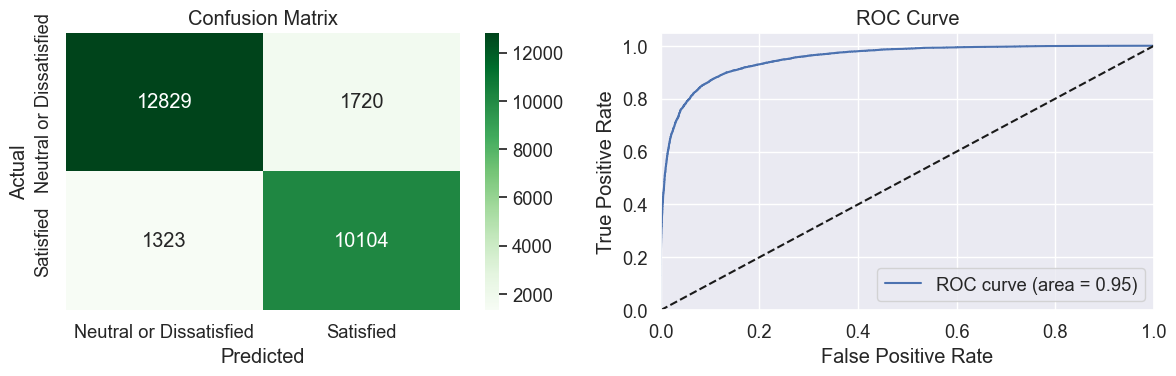

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Lasso Logistic Regression,0.884547,0.852189,0.887814,0.882045,0.869637,0.884778,0.850697,0.88875,0.881768,0.869307,0.882853,0.854533,0.884222,0.881779,0.869124


In [30]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with Lasso regularization
log_reg_l1 = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', penalty='l1')
df_reg_l1 = classification('Lasso Logistic Regression', log_reg_l1, X, Y)
display(df_reg_l1)


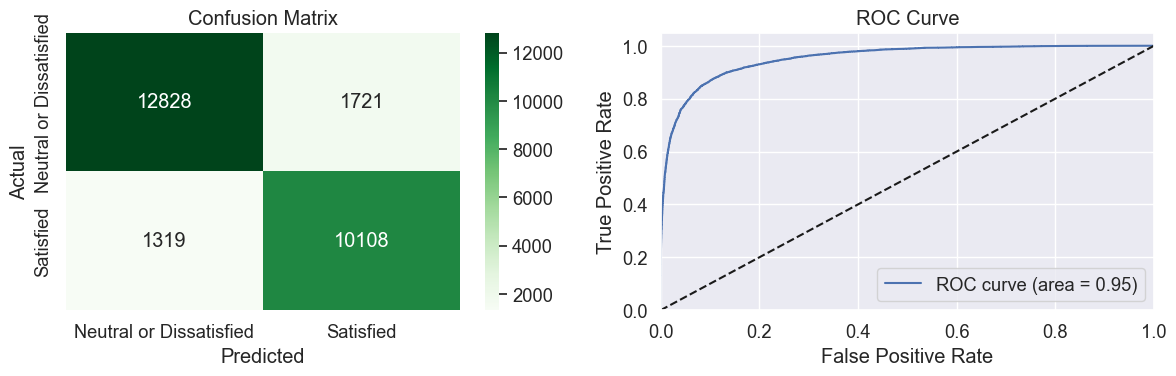

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Ridge Logistic Regression,0.884534,0.852125,0.887873,0.881977,0.869632,0.884778,0.850577,0.888929,0.881632,0.86933,0.882969,0.85451,0.884572,0.88171,0.869281


In [31]:
# Logistic Regression with Ridge regularization
log_reg_l2 = LogisticRegression(random_state=42, solver='liblinear', penalty='l2', class_weight='balanced')
df_reg_l2 = classification('Ridge Logistic Regression', log_reg_l2, X, Y)
display(df_reg_l2)


In [32]:
def comparison_chart(df_results):

  # Transpose the DataFrame
  df_tidy = df_results.T

  # Set column names
  df_tidy.columns = df_tidy.iloc[0]
  df_tidy = df_tidy[1:]

  # Reset index
  df_tidy = df_tidy.reset_index()

  # Melt the DataFrame
  df_melted = df_tidy.melt(id_vars='index', var_name='Metric', value_name='Value')

  # Create a color palette
  colors = sns.color_palette('Set3', n_colors=len(df_melted['Metric'].unique()))

  # Create the Seaborn barplot
  sns.barplot(x='index', y='Value', hue='Metric', data=df_melted, palette=colors, edgecolor='black' )
  plt.xlabel('Metric')
  plt.ylabel('Value')
  plt.title('Comparison of Metrics')

  # Rotate x-axis labels
  plt.xticks(rotation=90)

  # Place legend outside the plot area
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., ncol=1)

  plt.show()




,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Lasso Logistic Regression,0.884547,0.852189,0.887814,0.882045,0.869637,0.884778,0.850697,0.88875,0.881768,0.869307,0.882853,0.854533,0.884222,0.881779,0.869124
0,Ridge Logistic Regression,0.884534,0.852125,0.887873,0.881977,0.869632,0.884778,0.850577,0.888929,0.881632,0.86933,0.882969,0.85451,0.884572,0.88171,0.869281


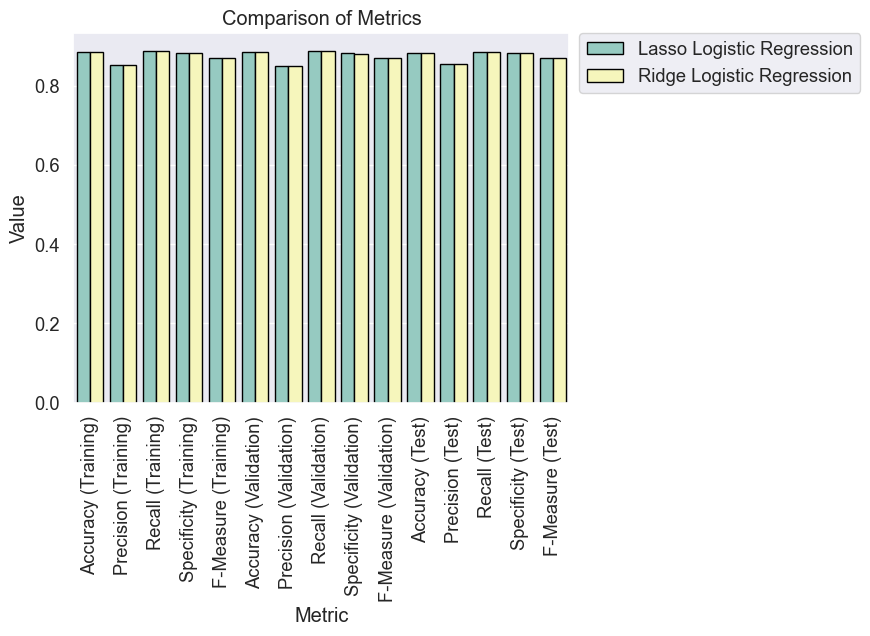

In [33]:
df_results = pd.concat([df_reg_l1, df_reg_l2])
display(df_results)
comparison_chart(df_results)
df_results.drop(df_results.index, inplace=True) # Once the comparison is done, we empty the dataframe

As could be imagined, the two models have imperceptible differences in the values ​​of the metrics. Let's perform a more in-depth analysis by viewing the regression coefficients.

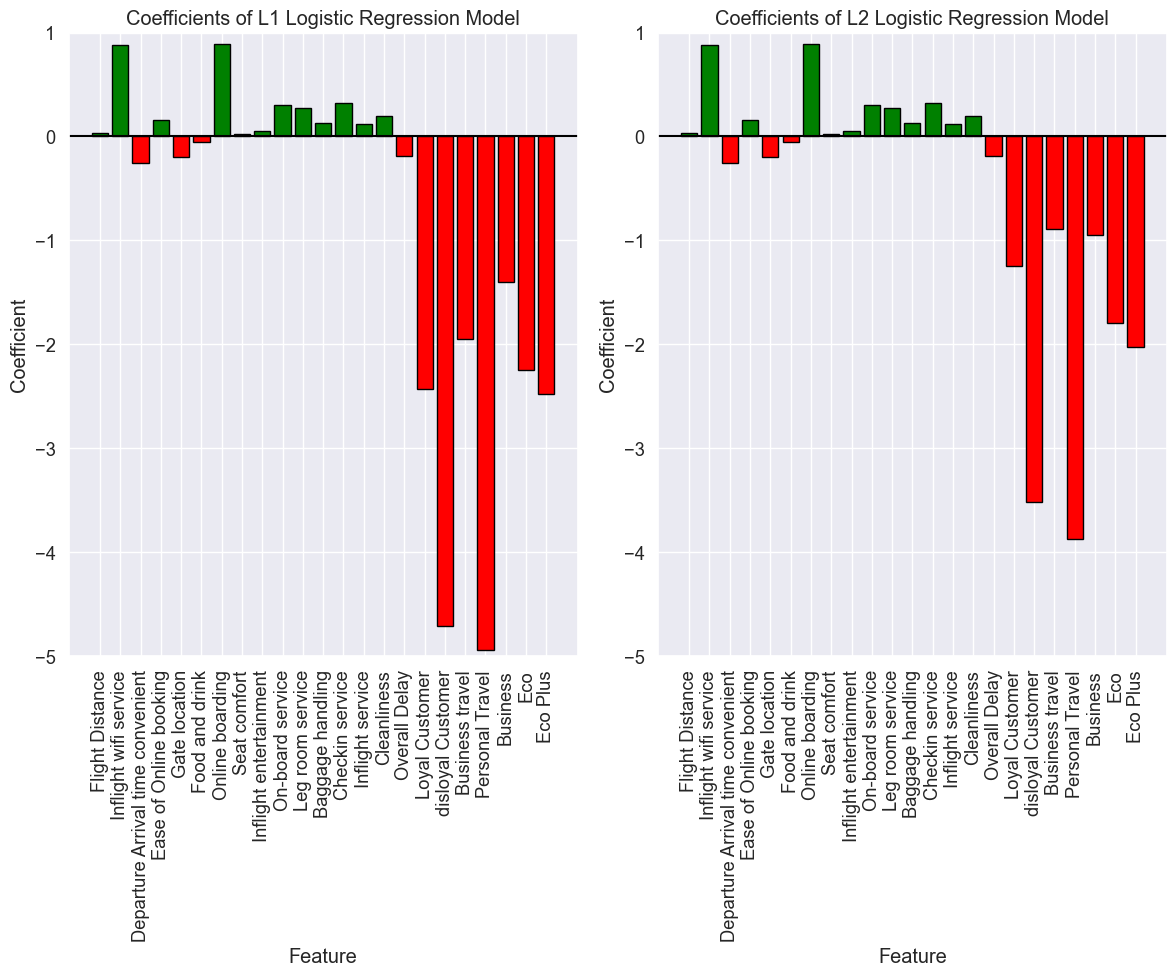

In [34]:
# Get the coefficients for L1 and L2 models
coefficients_l1 = log_reg_l1.coef_[0]
coefficients_l2 = log_reg_l2.coef_[0]

# Get feature names
feature_names = X.columns

# Determine colors for coefficients for L1 and L2 models
colors_l1 = ['red' if c < 0 else 'green' for c in coefficients_l1]
colors_l2 = ['red' if c < 0 else 'green' for c in coefficients_l2]

# Create a figure and subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

# Create bar plots for coefficients of L1 and L2 models
ax1.bar(feature_names, coefficients_l1, color=colors_l1, edgecolor='black')
ax2.bar(feature_names, coefficients_l2, color=colors_l2, edgecolor='black')

# Set titles and labels for the subplots
ax1.set_title("Coefficients of L1 Logistic Regression Model")
ax1.set_xlabel("Feature")
ax1.set_ylabel("Coefficient")
ax2.set_title("Coefficients of L2 Logistic Regression Model")
ax2.set_xlabel("Feature")
ax2.set_ylabel("Coefficient")
ax1.axhline(0, color='black')
ax2.axhline(0, color='black')
ax1.set_xticklabels(feature_names, rotation=90)
ax2.set_xticklabels(feature_names, rotation=90)
ax1.set_ylim(-5, 1)
ax2.set_ylim(-5, 1)
plt.tight_layout()
plt.show()


By comparing the graphs we can see how the negative regression coefficients have a greater value when LASSO regularization is used. In general, higher regression coefficients indicate a greater influence of the attributes on the target variable. We then select, for the final comparison of the classification methods, the logistic regression model that takes advantage of the LASSO regularization.

### SGD classification

The Stochastic Gradient Descent (SGD) classification algorithm is a widely used optimization method for training classification models.
We are going to carry out the classification through this method by adopting a grid search approach where, in the first case, we consider the learning rate uniform while in the second we consider it optimal (through the use of heuristics the learning rate adapts to each iteration)

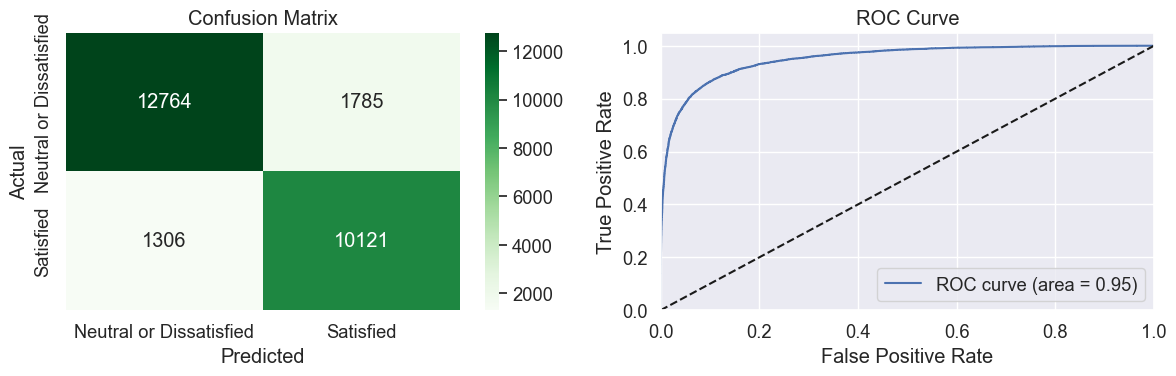

Best Parameters of Grid Search constant:  {'loss': 'log_loss', 'penalty': 'l1'}


,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,SGD grid constant,0.882109,0.847538,0.887932,0.877649,0.867265,0.883469,0.847167,0.890357,0.878249,0.868225,0.881006,0.850076,0.885709,0.877311,0.867527


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Type of regularization to apply
    'loss': ['log_loss', 'squared_error'],  # Select the loss function
}

sgd_constant = SGDClassifier(learning_rate='constant', random_state=42, eta0=0.01)
# Perform classification
grid_search_constant = GridSearchCV(estimator=sgd_constant, param_grid=param_grid, cv=5)
df_risultati_sgd_grid_constant = classification('SGD grid constant', grid_search_constant, X, Y)
print('Best Parameters of Grid Search constant: ', grid_search_constant.best_params_)
display(df_risultati_sgd_grid_constant)


The best parameters in this case are:

* Loss function log_loss
* LASSO regularization methodologists

Let's now calculate the case in which the learning rate updates optimally at each iteration

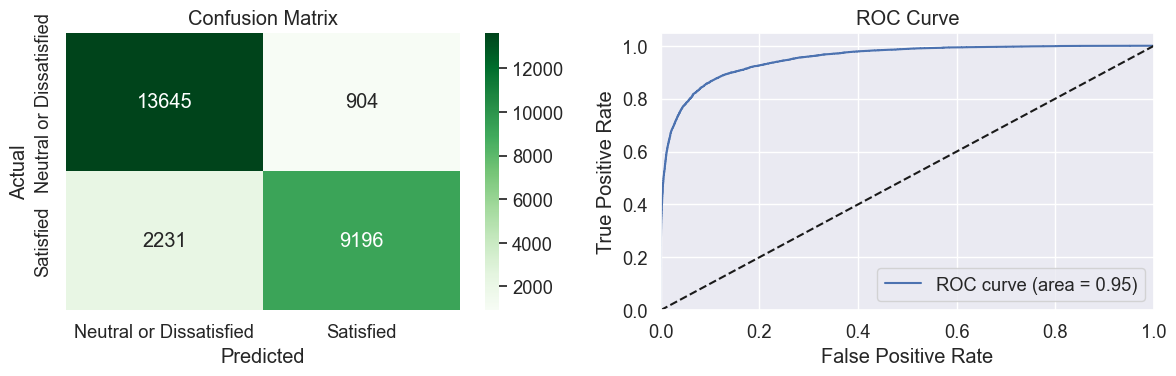

Best Parameters of Grid Search Optimal:  {'loss': 'log_loss', 'penalty': 'l2'}


,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,SGD grid opt,0.883469,0.912027,0.809414,0.940195,0.857662,0.882468,0.905687,0.811964,0.93591,0.856269,0.879312,0.910495,0.804761,0.937865,0.854369


In [36]:
sgd_opt = SGDClassifier(random_state=42, learning_rate='optimal', eta0=0.01)
# Perform classification
grid_search_opt = GridSearchCV(estimator=sgd_opt, param_grid=param_grid, cv=5)
df_results_sgd_grid_opt = classification('SGD grid opt', grid_search_opt, X, Y)
print('Best Parameters of Grid Search Optimal: ', grid_search_opt.best_params_)
display(df_results_sgd_grid_opt)


In this case the regularization methodology best suited to the model is Ridge while the loss function remains the same (log_loss). Also to be taken into consideration is the training speed of this classifier which is slower. In fact, it took longer to obtain the results.

Let's compare the results obtained from the two grid searches

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,SGD grid constant,0.882109,0.847538,0.887932,0.877649,0.867265,0.883469,0.847167,0.890357,0.878249,0.868225,0.881006,0.850076,0.885709,0.877311,0.867527
0,SGD grid opt,0.883469,0.912027,0.809414,0.940195,0.857662,0.882468,0.905687,0.811964,0.93591,0.856269,0.879312,0.910495,0.804761,0.937865,0.854369


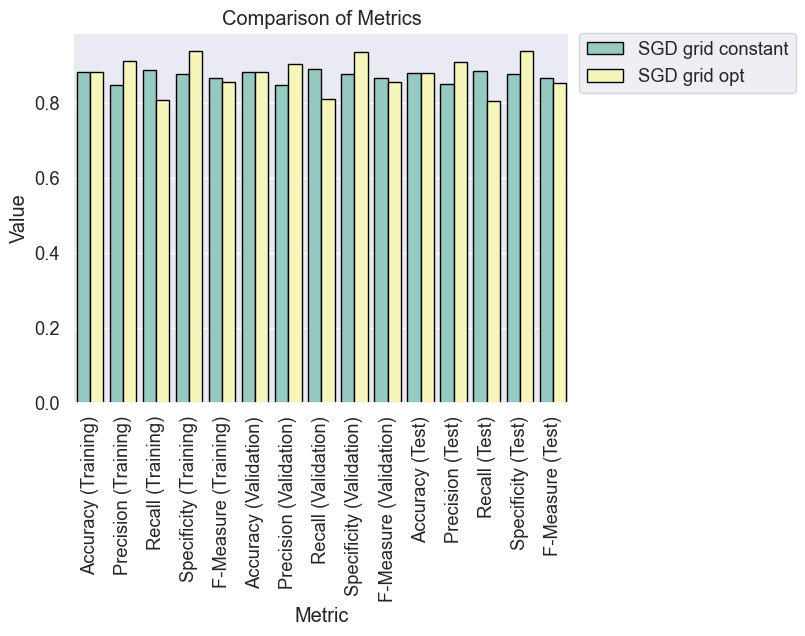

In [37]:
df_results.drop(df_results.index, inplace=True)  # Once the comparison is done, we empty the dataframe
df_results = pd.concat([df_risultati_sgd_grid_constant, df_results_sgd_grid_opt])
display(df_results)
comparison_chart(df_results)


Ultimately, for our analyses, it is more appropriate to choose the SGD grid constant model for the final comparison between models.

### Decision trees
The next classifier we will look at is the decision tree. Let's now make a first attempt at classification considering a tree classifier for which we are not going to define attributes. By not imposing depth limits, the tree is expected to become very complex and therefore have a tendency to overfit.

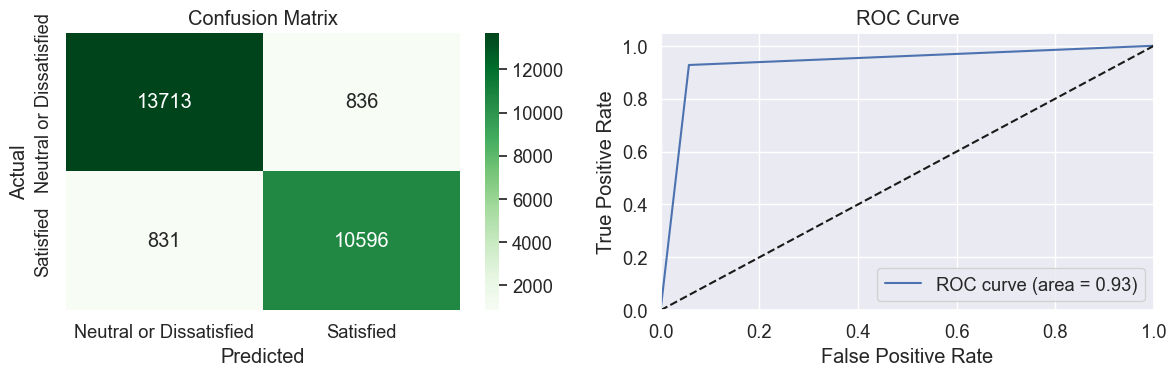

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision Trees no limits,1.0,1.0,1.0,1.0,1.0,0.936249,0.92554,0.926696,0.943489,0.926118,0.935825,0.926872,0.927278,0.942539,0.927075


In [38]:
df_results_tree_no_limits = classification("Decision Trees no limits", DecisionTreeClassifier(random_state=42), X, Y)

display(df_results_tree_no_limits)


As we expected, if you analyze the metrics results there is a tendency towards overfitting.
To improve the situation, a limit must therefore be set to the depth of the decision tree, since by doing so we reduce the complexity of the model and consequently its ability to excessively adapt to the training data.

We start with a model which only has depth limits arbitrarily set equal to 10 to check whether the tendency to overfit decreases.

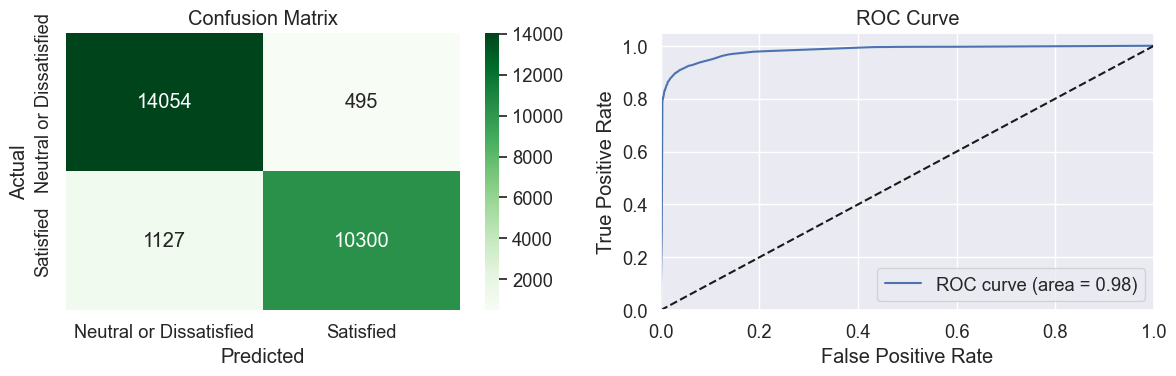

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision Trees_10,0.945552,0.958463,0.914085,0.969656,0.935748,0.938713,0.95091,0.904554,0.964605,0.927153,0.937558,0.954145,0.901374,0.965977,0.927009


In [39]:
# Training decision trees with a depth limit of 10
df_results_tree_lim_10 = classification("Decision Trees_10", DecisionTreeClassifier(max_depth=10, random_state=42), X, Y)
display(df_results_tree_lim_10)


Restricting the height of the tree seems to decrease overfitting on the data. The results of the metrics, despite this limitation, are still very high.
Let's now carry out a grid search to identify the best decision tree for classifying our data.

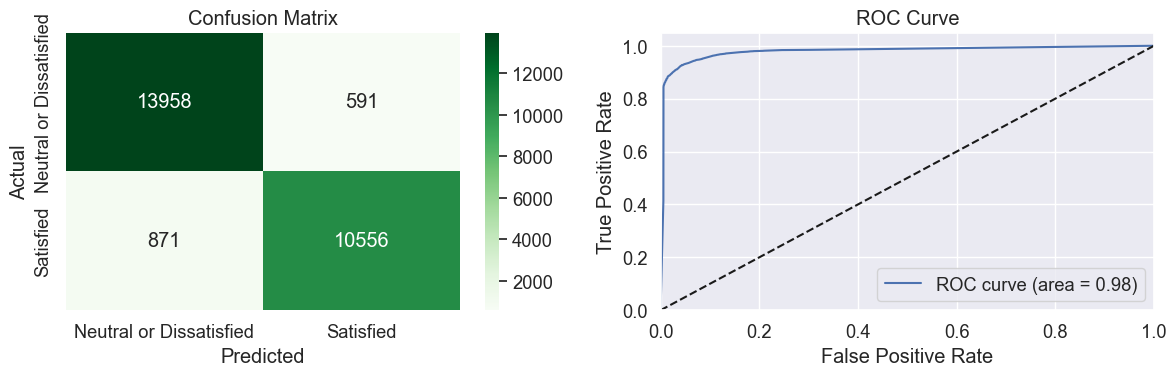

Best parameters obtained with grid search:  {'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 4}


,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision Trees_grid,0.960335,0.965331,0.942398,0.974075,0.953727,0.946258,0.94808,0.926071,0.961559,0.936947,0.943717,0.946981,0.923777,0.959379,0.935235


In [40]:
# Definition of the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Definition of the parameter values to be tested
param_grid = {
    'max_depth': [5, 10, 15],  # Values to test for maximum depth
    'min_samples_split': [4, 5, 8],  # Values to test for the minimum number of samples required to split an internal node
    'min_samples_leaf': [3, 5, 7]  # Values to test for the minimum number of samples required to form a leaf
}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
df_results_tree_grid = classification("Decision Trees_grid", grid_search, X, Y)
print('Best parameters obtained with grid search: ', grid_search.best_params_)
display(df_results_tree_grid)


After carrying out the grid search, the best parameters to use are:
* Depth limit equal to 15
* Number of records for each leaf node equal to 5
* A number of records of 4 for node separation
* The area of the ROC curve appears to be the same as the previous model.

We compare the results obtained with the decision trees

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision Trees_10,0.945552,0.958463,0.914085,0.969656,0.935748,0.938713,0.95091,0.904554,0.964605,0.927153,0.937558,0.954145,0.901374,0.965977,0.927009
0,Decision Trees_grid,0.960335,0.965331,0.942398,0.974075,0.953727,0.946258,0.94808,0.926071,0.961559,0.936947,0.943717,0.946981,0.923777,0.959379,0.935235


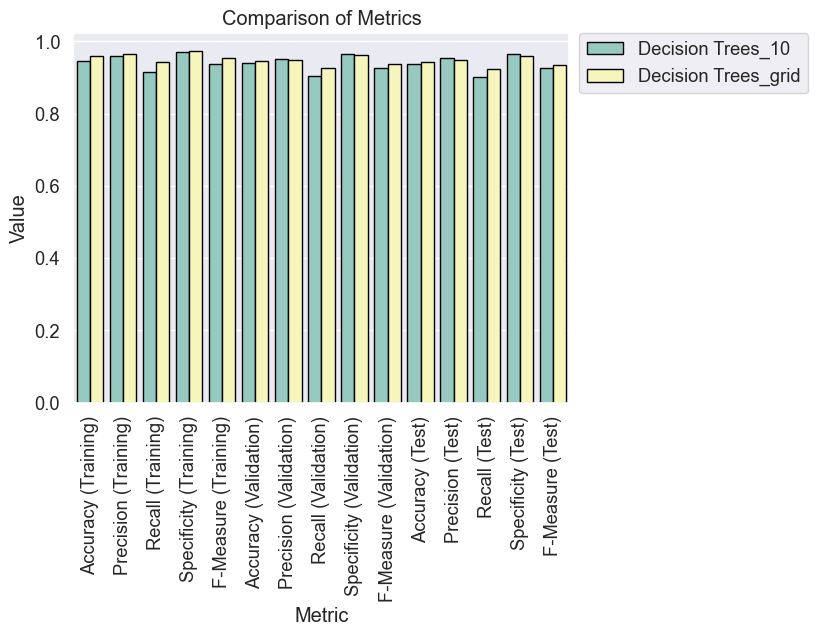

In [41]:
df_results.drop(df_results.index, inplace=True) # Once the comparison is done, we empty the dataframe
df_results = pd.concat([df_results, df_results_tree_lim_10, df_results_tree_grid])
display(df_results)
comparison_chart(df_results)


If we compare the results of the metrics obtained on the test data, the tree with a depth limit of 10 appears to have higher Accuracy, Recall and Specificity values. Another consideration that can be made to determine the choice of model is that the decision tree with a maximum height of 10 is much simpler to interpret than the tree obtained with grid search.
We can therefore conclude that the tree that will be used in the comparison is Decision Trees_10.


### Multi-level Neural Networks
Two neural networks with two hidden layers each made up of 20 nodes will be compared. These networks will differ in terms of activation function (in the first case the logistic sigmoid function will be used while in the second the hyperbolic tangent).

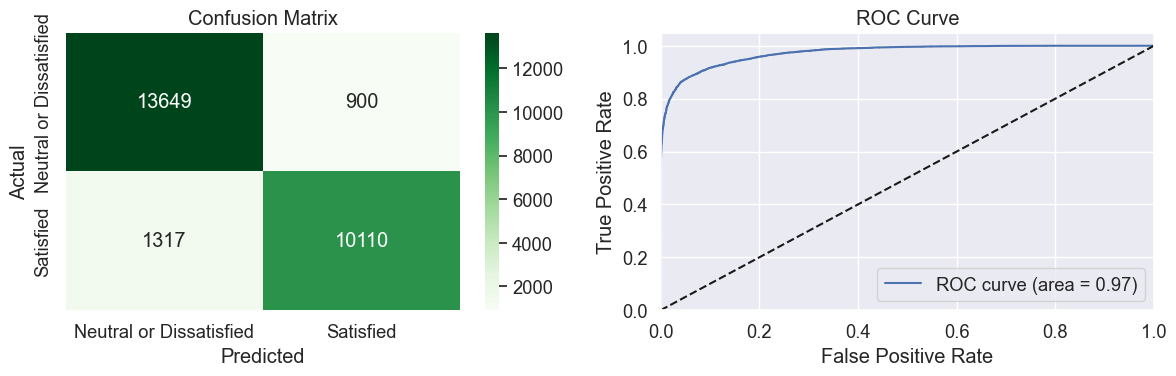

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Neural Network,0.918938,0.918938,0.891778,0.939742,0.905154,0.917308,0.916605,0.889107,0.938684,0.902647,0.914652,0.918256,0.884747,0.93814,0.90119


In [42]:
from sklearn.neural_network import MLPClassifier

# Neural network with adaptive learning rate and logistic activation function
mlp_log = MLPClassifier(random_state=42, learning_rate='adaptive', hidden_layer_sizes=(20,20), activation='logistic', solver='sgd')
df_results_mlp_log = classification("Logistic Neural Network", mlp_log, X, Y)
display(df_results_mlp_log)


The results of this neural network are very promising.

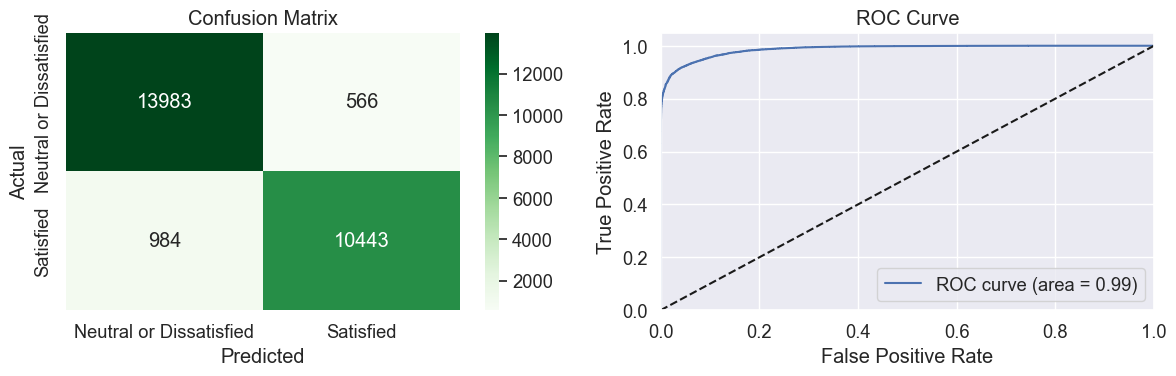

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Neural Network Tanh,0.942434,0.947872,0.917754,0.961339,0.93257,0.940715,0.946891,0.91375,0.961153,0.930025,0.94033,0.948588,0.913888,0.961097,0.930915


In [43]:
# Neural network with adaptive learning rate and hyperbolic tangent activation function
mlp_tanh = MLPClassifier(random_state=42, learning_rate='adaptive', hidden_layer_sizes=(20,20), activation='tanh', solver='sgd')
df_results_mlp_tanh = classification("Neural Network Tanh", mlp_tanh, X, Y)
display(df_results_mlp_tanh)


This second neural network which uses the hyperbolic tangent as an activation function seems to have superior performance compared to the previous one.
Let's compare the results better using a bar graph.

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Logistic Neural Network,0.918938,0.918938,0.891778,0.939742,0.905154,0.917308,0.916605,0.889107,0.938684,0.902647,0.914652,0.918256,0.884747,0.93814,0.90119
0,Neural Network Tanh,0.942434,0.947872,0.917754,0.961339,0.93257,0.940715,0.946891,0.91375,0.961153,0.930025,0.94033,0.948588,0.913888,0.961097,0.930915


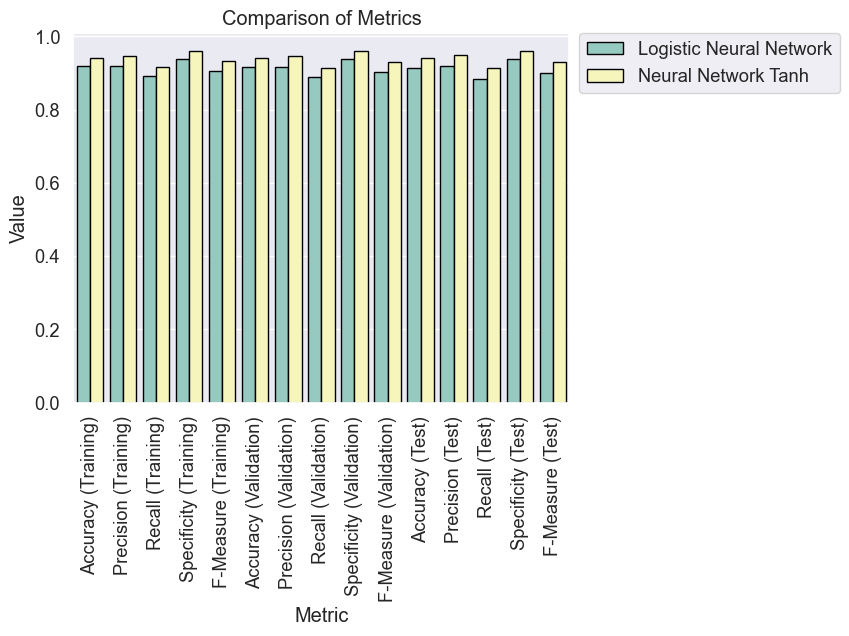

In [44]:
df_results.drop(df_results.index, inplace=True)  # Once the comparison is done, we empty the dataframe
df_results = pd.concat([df_results_mlp_log, df_results_mlp_tanh])
display(df_results)
comparison_chart(df_results)


From the graphical comparison it is possible to see how the neural network that uses the hyperbolic tangent as the activation function has all the metric values ​​higher than the network that uses the logistic sigmoid activation function. For the comparison between models we therefore use the network that exploits the hyperbolic tangent.

### Ensemble Classifier
Ensemble classification techniques are strategies that combine the results of multiple classification models to improve the overall performance of the model.
The ensemble classifiers that we will analyze are the following:

* Bagging
* Random Forest
* Voting
]Boosting, especially the AdaBoost algorithm

## Bagging
This technique consists of training multiple independent models on randomly selected samples from the training dataset. At the basis of the bagging algorithm that we are going to consider there are trees with a height limited to the value 10. The choice of trees is due to their training speed.
The parameters used in bagging are:
* n_estimators: indicates the number of independent Decision Tree classifiers to train.
* bootstrap=True: Indicates whether samples are drawn with replacement
We got this model which turns out to be very good.

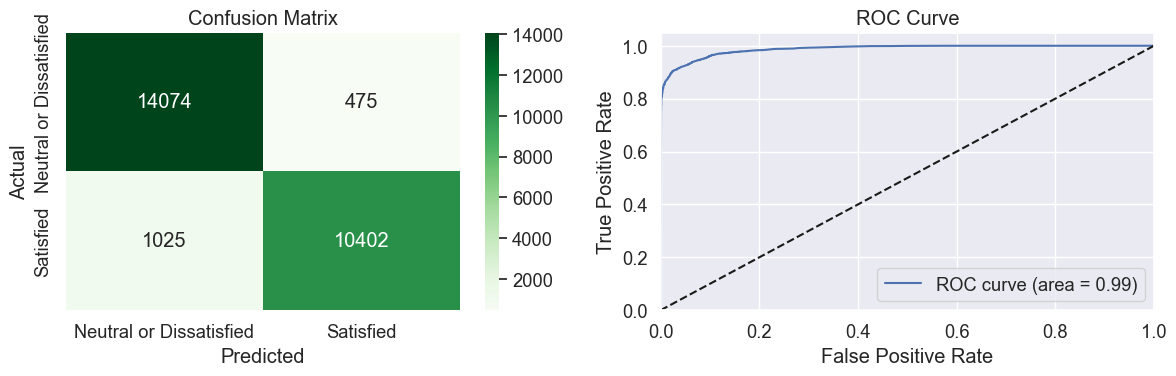

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Bagging,0.949915,0.959969,0.92302,0.970517,0.941132,0.943717,0.953605,0.913929,0.966297,0.933345,0.942254,0.95633,0.9103,0.967352,0.932747


In [45]:
from sklearn.ensemble import BaggingClassifier

df_results_bagging = classification("Bagging", BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=30, bootstrap=True), X, Y)

display(df_results_bagging)

Metric values do not fall below 90%. This classifier is therefore very precise.

## Random Forest 
This technique combines the concept of bagging with decision trees. You must be careful when choosing the p value (which is indicated with max_features in the parameters). In this case we use a fairly common value in the literature, namely:

p=√d
 
where d indicates the number of attributes.

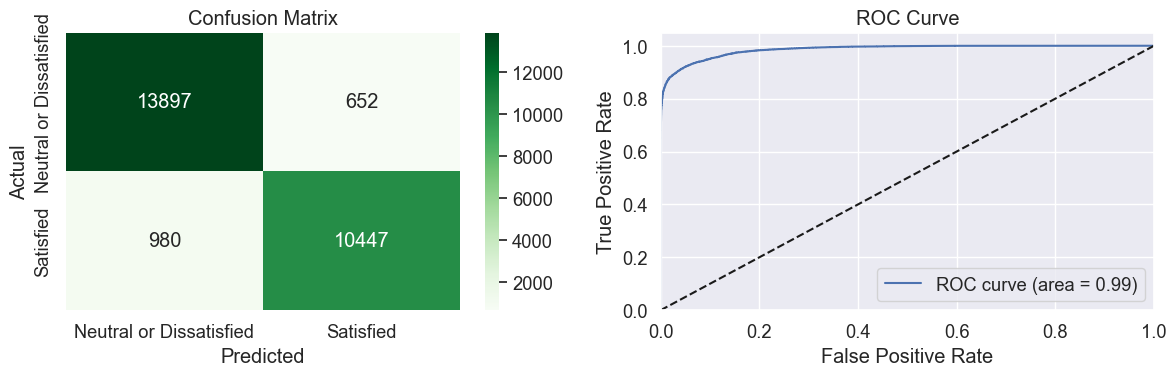

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Random Forest,0.943153,0.945866,0.921689,0.959594,0.933621,0.938174,0.938002,0.917232,0.954047,0.927501,0.937173,0.941256,0.914238,0.955186,0.92755


In [46]:
from sklearn.ensemble import RandomForestClassifier

df_results_RF = classification("Random Forest",  RandomForestClassifier(n_estimators=30, max_depth=10, max_features = 'sqrt',random_state=42), X, Y)

display(df_results_RF)

From the analysis of the results we can conclude that the Random Forest classifier is also very effective.

## Voting
In this technique, several independent classification models are trained on the same dataset. Model predictions are combined via majority voting or based on class membership probability to obtain a final prediction.
The classifiers that we will use are the best ones selected in the previous section, namely:
* Logistic Regression with LASSO regularization
* SGD classifier with constant learning rate
* Decision tree with only limit on height, set to 10
* Neural network that uses the hyperbolic tangent as activation function

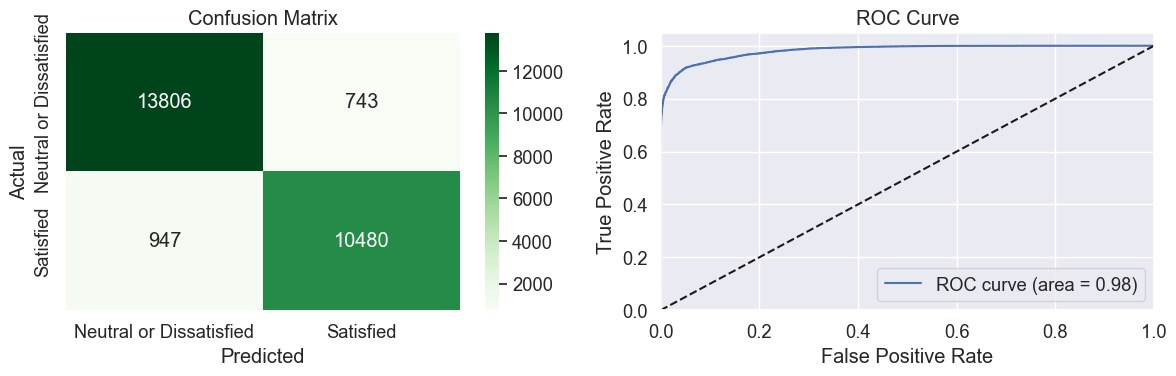

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Voting,0.935184,0.930621,0.919085,0.947515,0.924817,0.934478,0.929852,0.917232,0.94755,0.923499,0.93494,0.933797,0.917126,0.948931,0.925386


In [47]:
from sklearn.ensemble import VotingClassifier

df_results_Voting = classification("Voting", VotingClassifier(
    estimators=[
        ('DTC', DecisionTreeClassifier(max_depth=10)),
        ('MLP', mlp_tanh),
        ('SGD', SGDClassifier(random_state=42, loss='log_loss', penalty='l1', learning_rate='constant', eta0=0.01)),
        ('Logistic Regression', LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight='balanced'))
    ],
    voting='soft'), X, Y)  # Weighted vote based on class probabilities

display(df_results_Voting)


This ensemble algorithm also has excellent performance.

## Boosting
AdaBoost is one of the most used boosting algorithms. The main goal of AdaBoost is to create a strong classifier by combining a number of weak classifiers.

Each classifier in turn has a weight dictated by the value of the alpha parameter. Alpha depends on the errors made by the classifier.

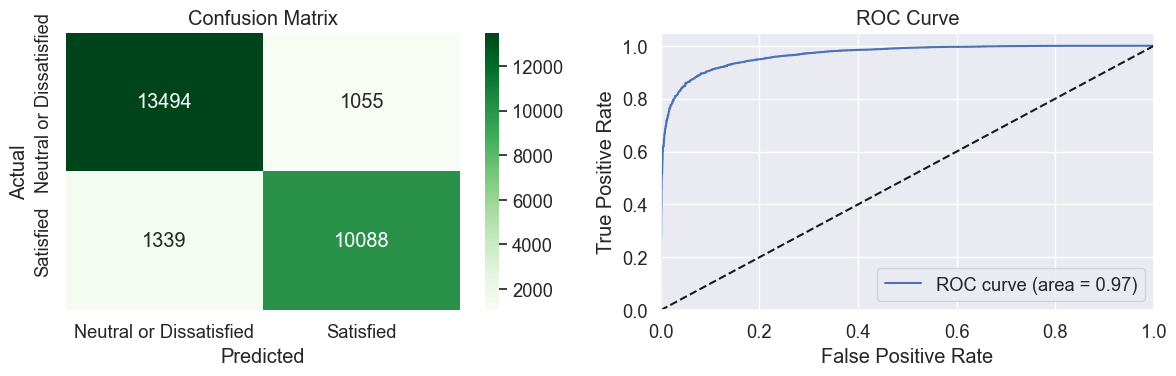

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,AdaBoost,0.908197,0.902146,0.884264,0.92653,0.893115,0.90753,0.900127,0.883571,0.92569,0.891773,0.907838,0.905322,0.882821,0.927486,0.89393


In [48]:
from sklearn.ensemble import AdaBoostClassifier

df_results_AdaBoost = classification("AdaBoost",  AdaBoostClassifier(n_estimators=30, random_state=42), X, Y)

display(df_results_AdaBoost)

This esnamble classifier also performs well. At the moment the area under the ROC curve is the lowest recorded so far for ensemble classifiers (0.97). Classification errors also increase for both positive and negative records.

### Model comparison
All the techniques examined in the previous phases have provided good results. In this phase the models obtained will be compared.
Let's first carry out an initial comparison between the "single" models

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Lasso Logistic Regression,0.884547,0.852189,0.887814,0.882045,0.869637,0.884778,0.850697,0.88875,0.881768,0.869307,0.882853,0.854533,0.884222,0.881779,0.869124
0,SGD grid constant,0.882109,0.847538,0.887932,0.877649,0.867265,0.883469,0.847167,0.890357,0.878249,0.868225,0.881006,0.850076,0.885709,0.877311,0.867527
0,Decision Trees_10,0.945552,0.958463,0.914085,0.969656,0.935748,0.938713,0.95091,0.904554,0.964605,0.927153,0.937558,0.954145,0.901374,0.965977,0.927009
0,Neural Network Tanh,0.942434,0.947872,0.917754,0.961339,0.93257,0.940715,0.946891,0.91375,0.961153,0.930025,0.94033,0.948588,0.913888,0.961097,0.930915


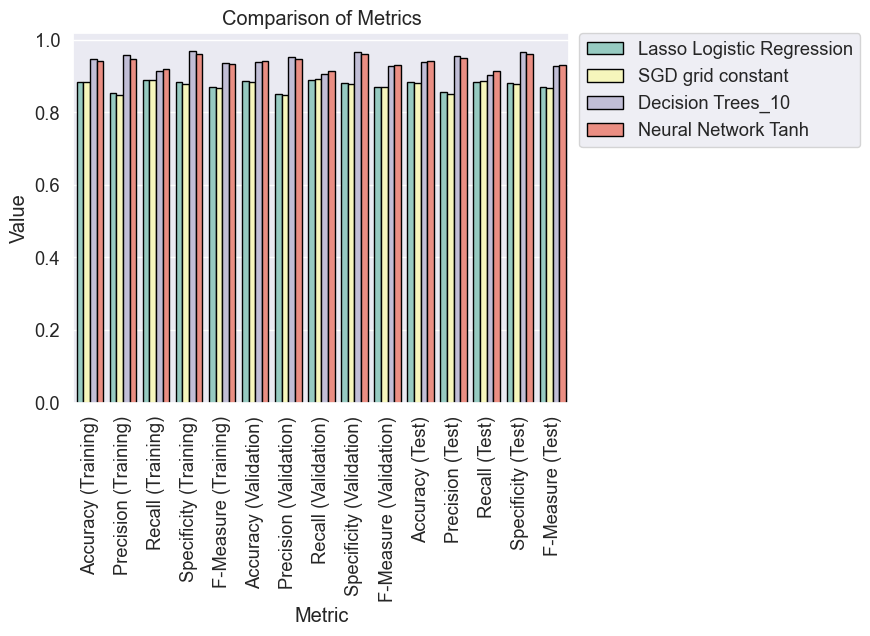

In [49]:
df_results.drop(df_results.index, inplace=True)  # Once the comparison is done, we empty the dataframe
df_results = pd.concat([df_results, df_reg_l1, df_risultati_sgd_grid_constant, df_results_tree_lim_10, df_results_mlp_tanh])
display(df_results)
comparison_chart(df_results)


From the analysis of the graph we can immediately notice that the two models that have the best results are:
* Decision tree with maximum height 10
* Neural network that exploits the hyperbolic tangent as an activation function

Let us now compare the ensemble classification models.

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Bagging,0.949915,0.959969,0.92302,0.970517,0.941132,0.943717,0.953605,0.913929,0.966297,0.933345,0.942254,0.95633,0.9103,0.967352,0.932747
0,Random Forest,0.943153,0.945866,0.921689,0.959594,0.933621,0.938174,0.938002,0.917232,0.954047,0.927501,0.937173,0.941256,0.914238,0.955186,0.92755
0,Voting,0.935184,0.930621,0.919085,0.947515,0.924817,0.934478,0.929852,0.917232,0.94755,0.923499,0.93494,0.933797,0.917126,0.948931,0.925386
0,AdaBoost,0.908197,0.902146,0.884264,0.92653,0.893115,0.90753,0.900127,0.883571,0.92569,0.891773,0.907838,0.905322,0.882821,0.927486,0.89393


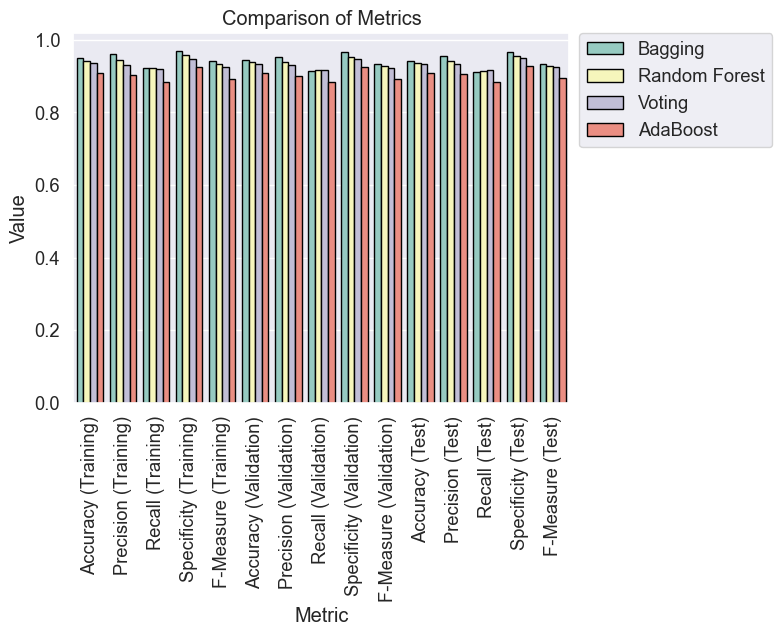

In [50]:
df_results.drop(df_results.index, inplace=True)  # Once the comparison is done, we empty the dataframe
df_results = pd.concat([df_results, df_results_bagging, df_results_RF, df_results_Voting, df_results_AdaBoost])
display(df_results)
comparison_chart(df_results)


Also in this case from the graphical analysis we note that the best ensemble classification models are:
* Bagging
* Random Forest
* Voting

We therefore put, in a single graph, the best classifiers we have selected.

,Model,Accuracy (Training),Precision (Training),Recall (Training),Specificity (Training),F-Measure (Training),Accuracy (Validation),Precision (Validation),Recall (Validation),Specificity (Validation),F-Measure (Validation),Accuracy (Test),Precision (Test),Recall (Test),Specificity (Test),F-Measure (Test)
0,Decision Trees_10,0.945552,0.958463,0.914085,0.969656,0.935748,0.938713,0.95091,0.904554,0.964605,0.927153,0.937558,0.954145,0.901374,0.965977,0.927009
0,Neural Network Tanh,0.942434,0.947872,0.917754,0.961339,0.93257,0.940715,0.946891,0.91375,0.961153,0.930025,0.94033,0.948588,0.913888,0.961097,0.930915
0,Bagging,0.949915,0.959969,0.92302,0.970517,0.941132,0.943717,0.953605,0.913929,0.966297,0.933345,0.942254,0.95633,0.9103,0.967352,0.932747
0,Random Forest,0.943153,0.945866,0.921689,0.959594,0.933621,0.938174,0.938002,0.917232,0.954047,0.927501,0.937173,0.941256,0.914238,0.955186,0.92755
0,Voting,0.935184,0.930621,0.919085,0.947515,0.924817,0.934478,0.929852,0.917232,0.94755,0.923499,0.93494,0.933797,0.917126,0.948931,0.925386


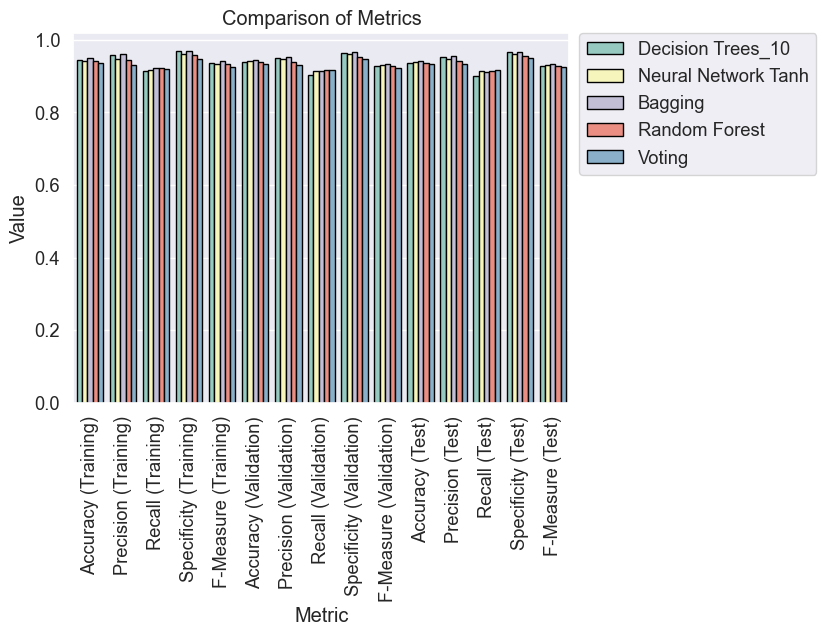

In [51]:
df_results.drop(df_results.index, inplace = True) #una vota effetuato il confronto svuotiamo il dataframe
df_results = pd.concat([df_results,df_results_tree_lim_10, df_results_mlp_tanh, df_results_bagging, df_results_RF, df_results_Voting])
display(df_results)
comparison_chart(df_results)

The models in the previous graph all have excellent performances, the ones with the absolute best performances are Bagging and the neural network.
In our specific case the preference falls on bagging, as we are interested in reducing the error of the classification of records belonging to the 'neutral or dissatisfied' class.